In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import random
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip "/content/drive/MyDrive/archive (1).zip"

Streaming output truncated to the last 5000 lines.
  inflating: training/Soup/223.jpg   
  inflating: training/Soup/224.jpg   
  inflating: training/Soup/225.jpg   
  inflating: training/Soup/226.jpg   
  inflating: training/Soup/227.jpg   
  inflating: training/Soup/228.jpg   
  inflating: training/Soup/229.jpg   
  inflating: training/Soup/23.jpg    
  inflating: training/Soup/230.jpg   
  inflating: training/Soup/231.jpg   
  inflating: training/Soup/232.jpg   
  inflating: training/Soup/233.jpg   
  inflating: training/Soup/234.jpg   
  inflating: training/Soup/235.jpg   
  inflating: training/Soup/236.jpg   
  inflating: training/Soup/237.jpg   
  inflating: training/Soup/238.jpg   
  inflating: training/Soup/239.jpg   
  inflating: training/Soup/24.jpg    
  inflating: training/Soup/240.jpg   
  inflating: training/Soup/241.jpg   
  inflating: training/Soup/242.jpg   
  inflating: training/Soup/243.jpg   
  inflating: training/Soup/244.jpg   
  inflating: training/Soup/245.jpg   

In [ ]:
TRAIN_DIR = f'/content/training'
VAL_DIR = f'/content/validation'
TEST_DIR= f'/content/evaluation'

val_loss = list()
val_accuracy = list()
test_loss= list()
test_accuracy = list()

In [ ]:
BATCH_SIZE = 16
seeds = 41
im_shape = (250,250)

In [ ]:
# Subdivision in test/validation
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_generator = ImageDataGenerator(rescale=1./255)


# Generatoing of Train
train_generator = data_generator.flow_from_directory(TRAIN_DIR, target_size=im_shape, shuffle=True, seed=seeds,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generatoing of Validation
validation_generator = val_data_generator.flow_from_directory(VAL_DIR, target_size=im_shape, shuffle=False, seed=seeds,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generatoing of Test
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seeds,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 7896 images belonging to 11 classes.
Found 682 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.
Classes: ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']


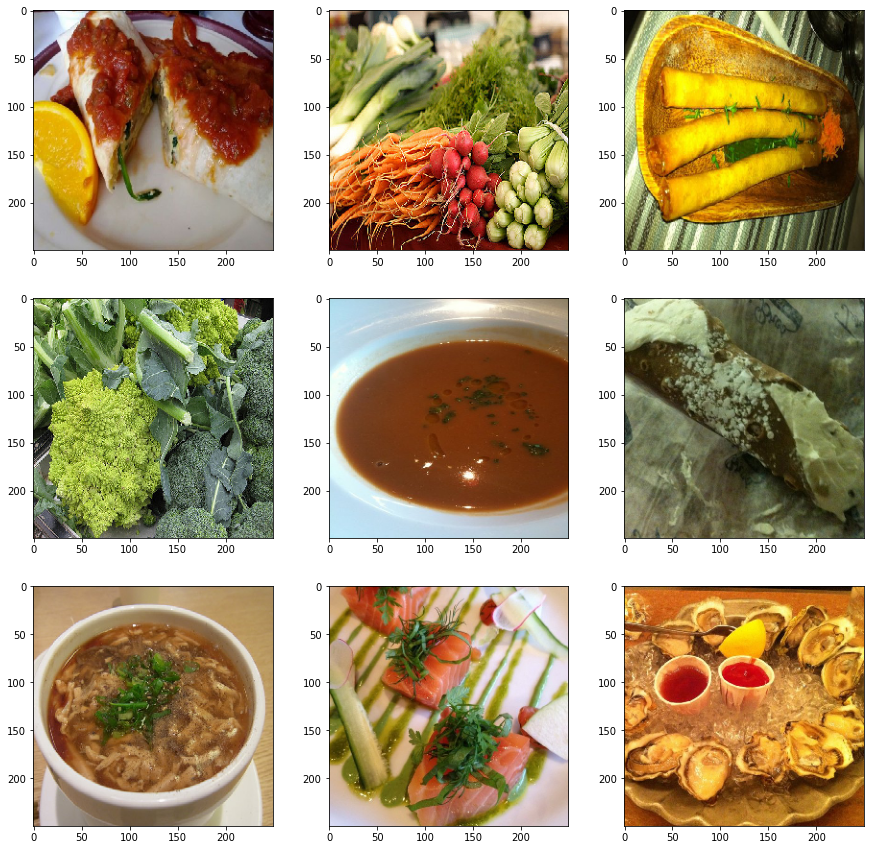

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 61, 61, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        1

In [ ]:
epochs = 12

#Callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1)
]

#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)


Epoch 1/12
493/493 [==============================] - ETA: 0s - loss: 2.2975 - accuracy: 0.1961
Epoch 1: val_loss improved from inf to 2.09107, saving model to model.h5
493/493 [==============================] - 74s 125ms/step - loss: 2.2975 - accuracy: 0.1961 - val_loss: 2.0911 - val_accuracy: 0.2783
Epoch 2/12
493/493 [==============================] - ETA: 0s - loss: 2.0205 - accuracy: 0.2879
Epoch 2: val_loss improved from 2.09107 to 1.91692, saving model to model.h5
493/493 [==============================] - 59s 120ms/step - loss: 2.0205 - accuracy: 0.2879 - val_loss: 1.9169 - val_accuracy: 0.3229
Epoch 3/12
493/493 [==============================] - ETA: 0s - loss: 1.8869 - accuracy: 0.3379
Epoch 3: val_loss improved from 1.91692 to 1.84753, saving model to model.h5
493/493 [==============================] - 65s 132ms/step - loss: 1.8869 - accuracy: 0.3379 - val_loss: 1.8475 - val_accuracy: 0.3229
Epoch 4/12
493/493 [==============================] - ETA: 0s - loss: 1.7223 - accu

In [ ]:
# Load the best saved model
from tensorflow.keras.models import load_model

#model = load_model('../input/classify-food-datas-models/model.h5')
model = load_model('model.h5')
score = model.evaluate_generator(validation_generator)
val_loss.append(score[0])
val_accuracy.append(score[1])
print('\n\nVal loss:', score[0])
print('Val accuracy:', score[1])

score = model.evaluate_generator(test_generator)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

test_loss.append(score[0])
test_accuracy.append(score[1])



Val loss: 1.7011817693710327
Val accuracy: 0.40615835785865784

Test loss: 1.6921459436416626
Test accuracy: 0.43949806690216064


In [ ]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
                 precision    recall  f1-score   support

          Bread       0.31      0.30      0.31       368
  Dairy product       0.36      0.14      0.20       148
        Dessert       0.38      0.45      0.41       500
            Egg       0.35      0.38      0.36       335
     Fried food       0.34      0.43      0.38       287
           Meat       0.57      0.50      0.53       432
  Noodles-Pasta       0.37      0.31      0.34       147
           Rice       0.12      0.05      0.07        96
        Seafood       0.45      0.33      0.38       303
           Soup       0.52      0.67      0.59       500
Vegetable-Fruit       0.77      0.69      0.73       231

       accuracy                           0.44      3347
      macro avg       0.41      0.39      0.39      3347
   weighted avg       0.44      0.44      0.43      3347



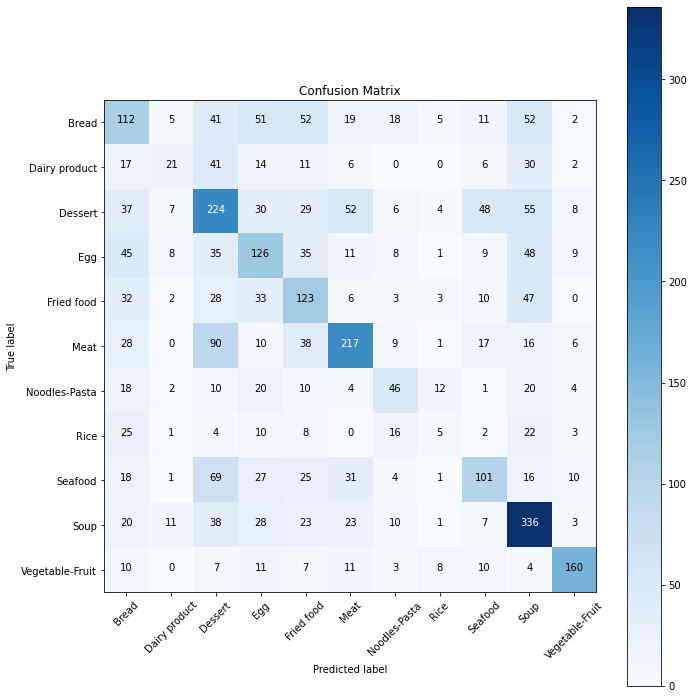

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_generator)#, nb_test_samples // BATCH_SIZE, workers=1)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

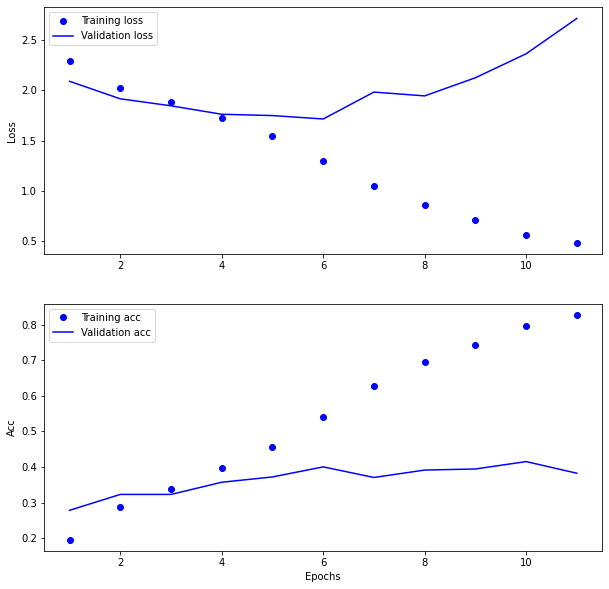

In [ ]:
#Training and validation Loss and Accuracy

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
#plt.title('Training and validation Loss and Accuracy')
#plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)


# Generating of Train
train_generator = data_generator.flow_from_directory(TRAIN_DIR, target_size=im_shape, shuffle=True, seed=seeds,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generating of Validation
validation_generator = val_data_generator.flow_from_directory(VAL_DIR, target_size=im_shape, shuffle=False, seed=seeds,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generating of Test
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seeds,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 7896 images belonging to 11 classes.
Found 682 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.
Classes: ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']


In [ ]:
model2 = Sequential()
model2.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(0.2))

model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()

# Compila o modelo
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 124, 124, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 61, 61, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 59, 59, 64)       

In [ ]:
epochs = 12

#Callback to save the best model
callbacks_list2 = [
    keras.callbacks.ModelCheckpoint(
        filepath='model2.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1)
]

#Training
history2 = model2.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list2,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)


Epoch 1/12
493/493 [==============================] - ETA: 0s - loss: 2.2662 - accuracy: 0.2006
Epoch 1: val_loss improved from inf to 2.06202, saving model to model2.h5
493/493 [==============================] - 165s 330ms/step - loss: 2.2662 - accuracy: 0.2006 - val_loss: 2.0620 - val_accuracy: 0.2693
Epoch 2/12
493/493 [==============================] - ETA: 0s - loss: 2.0634 - accuracy: 0.2706
Epoch 2: val_loss improved from 2.06202 to 1.97273, saving model to model2.h5
493/493 [==============================] - 162s 329ms/step - loss: 2.0634 - accuracy: 0.2706 - val_loss: 1.9727 - val_accuracy: 0.2842
Epoch 3/12
493/493 [==============================] - ETA: 0s - loss: 1.9814 - accuracy: 0.2984
Epoch 3: val_loss improved from 1.97273 to 1.88974, saving model to model2.h5
493/493 [==============================] - 161s 326ms/step - loss: 1.9814 - accuracy: 0.2984 - val_loss: 1.8897 - val_accuracy: 0.3185
Epoch 4/12
493/493 [==============================] - ETA: 0s - loss: 1.9250 

In [ ]:
model_2 = load_model('model2.h5')
score = model_2.evaluate_generator(validation_generator)

val_loss.append(score[0])
val_accuracy.append(score[1])

print('Val loss:', score[0])
print('Val accuracy:', score[1])

score = model_2.evaluate_generator(test_generator)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

test_loss.append(score[0])
test_accuracy.append(score[1])

Val loss: 1.4526821374893188
Val accuracy: 0.4809384047985077
Test loss: 1.4046730995178223
Test accuracy: 0.5216611623764038


Classification Report
                 precision    recall  f1-score   support

          Bread       0.36      0.32      0.34       368
  Dairy product       0.52      0.08      0.14       148
        Dessert       0.55      0.32      0.40       500
            Egg       0.46      0.46      0.46       335
     Fried food       0.44      0.48      0.46       287
           Meat       0.60      0.72      0.65       432
  Noodles-Pasta       0.36      0.70      0.47       147
           Rice       0.32      0.06      0.10        96
        Seafood       0.47      0.55      0.51       303
           Soup       0.59      0.80      0.68       500
Vegetable-Fruit       0.86      0.77      0.82       231

       accuracy                           0.52      3347
      macro avg       0.50      0.48      0.46      3347
   weighted avg       0.52      0.52      0.50      3347



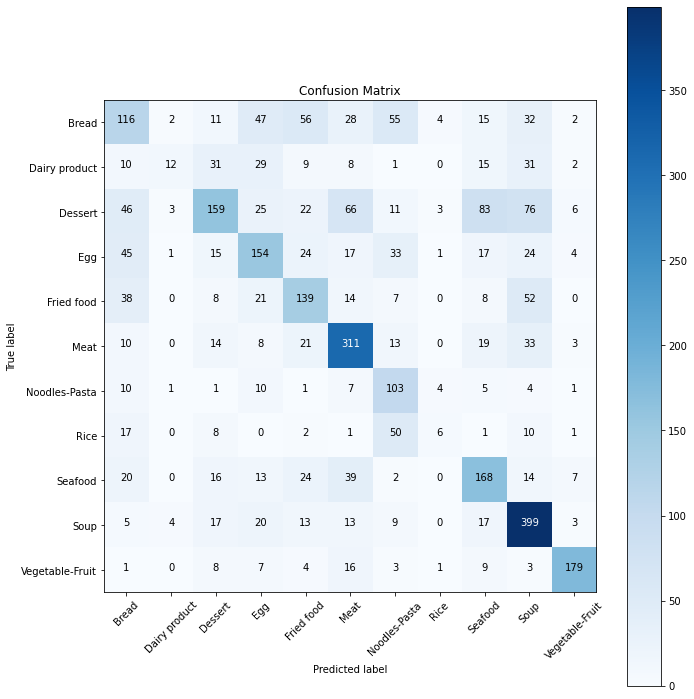

In [ ]:
#Confution Matrix and Classification Report
Y_pred = model_2.predict_generator(test_generator)#, nb_test_samples // BATCH_SIZE, workers=1)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

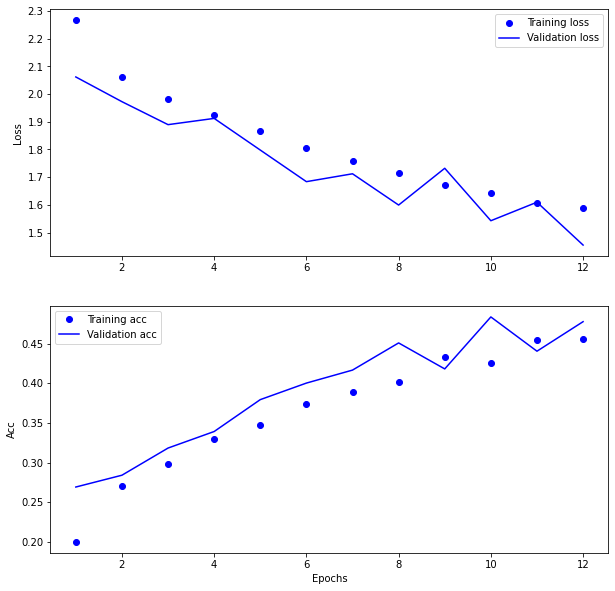

In [ ]:
#Training and validation Loss and Accuracy
history_dict = history2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
#plt.title('Training and validation Loss and Accuracy')
#plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=45,
        width_shift_range=0.2,
        height_shift_range=0.2,
        preprocessing_function=preprocess_input,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_generator = data_generator.flow_from_directory(TRAIN_DIR, target_size=im_shape, shuffle=True, seed=seeds,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generating of Train
validation_generator = val_data_generator.flow_from_directory(TRAIN_DIR, target_size=im_shape, shuffle=False, seed=seeds,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generating of Test

test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seeds,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 7896 images belonging to 11 classes.
Found 1970 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.
Classes: ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']


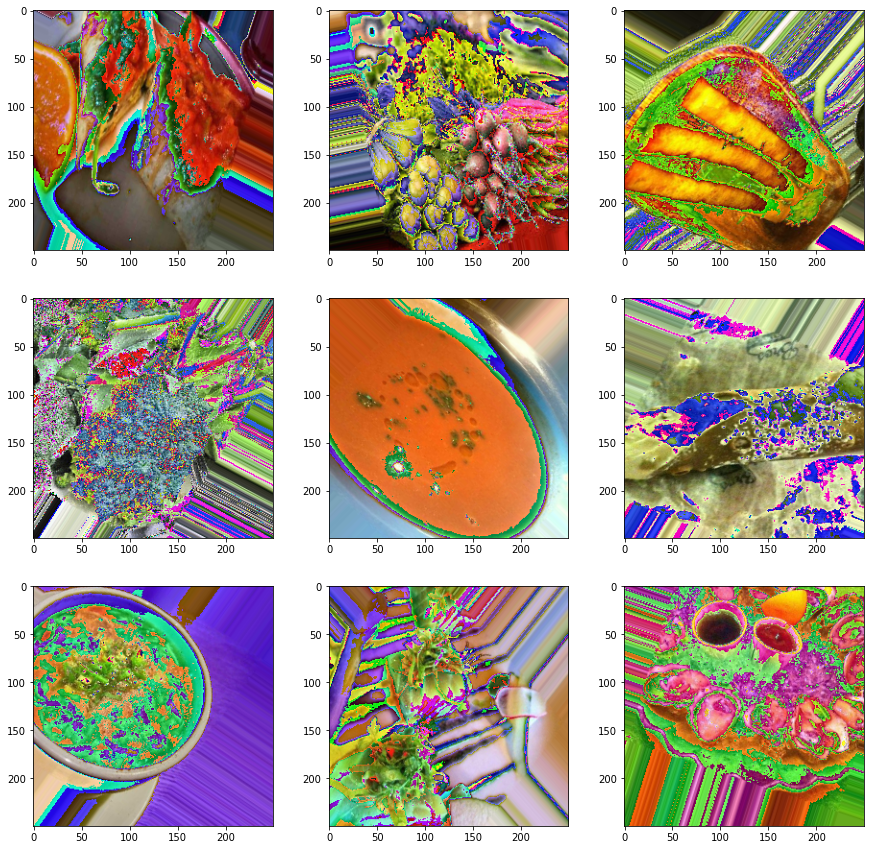

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [ ]:
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(im_shape[0], im_shape[1], 3))

x = base_model.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax', kernel_initializer='random_uniform')(x)

model3 = Model(inputs=base_model.input, outputs=predictions)

# Freezing pretrained layers
for layer in base_model.layers:
    layer.trainable=False
    
optimizer = Adam()
model3.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
epochs = 15

# Saving the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model3.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=6,verbose=1)
]

history = model3.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/15
493/493 [==============================] - ETA: 0s - loss: 1.0624 - accuracy: 0.6865
Epoch 1: val_loss improved from inf to 0.76850, saving model to model3.h5
493/493 [==============================] - 207s 394ms/step - loss: 1.0624 - accuracy: 0.6865 - val_loss: 0.7685 - val_accuracy: 0.7571
Epoch 2/15
493/493 [==============================] - ETA: 0s - loss: 0.7800 - accuracy: 0.7527
Epoch 2: val_loss improved from 0.76850 to 0.61903, saving model to model3.h5
493/493 [==============================] - 190s 385ms/step - loss: 0.7800 - accuracy: 0.7527 - val_loss: 0.6190 - val_accuracy: 0.7983
Epoch 3/15
493/493 [==============================] - ETA: 0s - loss: 0.6791 - accuracy: 0.7777
Epoch 3: val_loss improved from 0.61903 to 0.57986, saving model to model3.h5
493/493 [==============================] - 189s 382ms/step - loss: 0.6791 - accuracy: 0.7777 - val_loss: 0.5799 - val_accuracy: 0.8120
Epoch 4/15
493/493 [==============================] - ETA: 0s - loss: 0.6707 

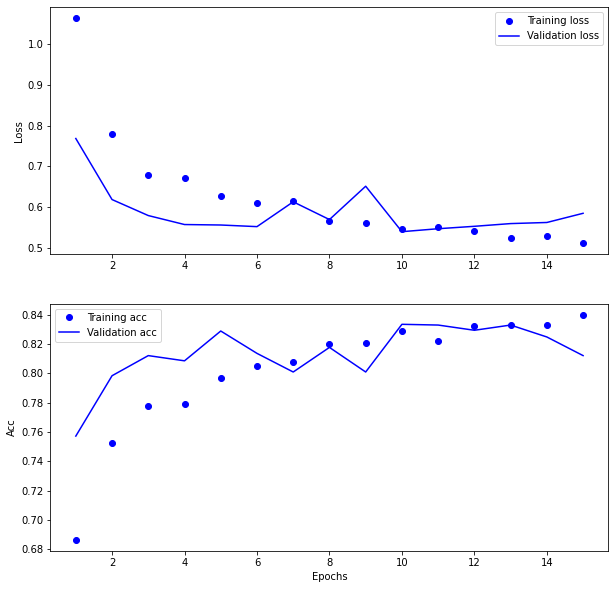

In [ ]:
#Training and validation Loss and Accuracy

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
#plt.title('Training and validation Loss and Accuracy')
#plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
# Load the best saved model
# model = load_model('../input/classify-food-datas-models/model3.h5')
model = load_model('model3.h5')
score = model.evaluate_generator(validation_generator)
val_loss.append(score[0])
val_accuracy.append(score[1])
print('Val loss:', score[0])
print('Val accuracy:', score[1])

score = model.evaluate_generator(test_generator)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

test_loss.append(score[0])
test_accuracy.append(score[1])

Val loss: 0.5405660271644592
Val accuracy: 0.8329949378967285
Test loss: 0.49372437596321106
Test accuracy: 0.8500149250030518


Classification Report
                 precision    recall  f1-score   support

          Bread       0.79      0.84      0.81       368
  Dairy product       0.82      0.64      0.72       148
        Dessert       0.87      0.74      0.80       500
            Egg       0.82      0.74      0.78       335
     Fried food       0.89      0.81      0.85       287
           Meat       0.79      0.92      0.85       432
  Noodles-Pasta       0.98      0.99      0.99       147
           Rice       0.98      0.92      0.95        96
        Seafood       0.69      0.92      0.79       303
           Soup       0.99      0.95      0.97       500
Vegetable-Fruit       0.93      0.88      0.91       231

       accuracy                           0.85      3347
      macro avg       0.87      0.85      0.86      3347
   weighted avg       0.86      0.85      0.85      3347



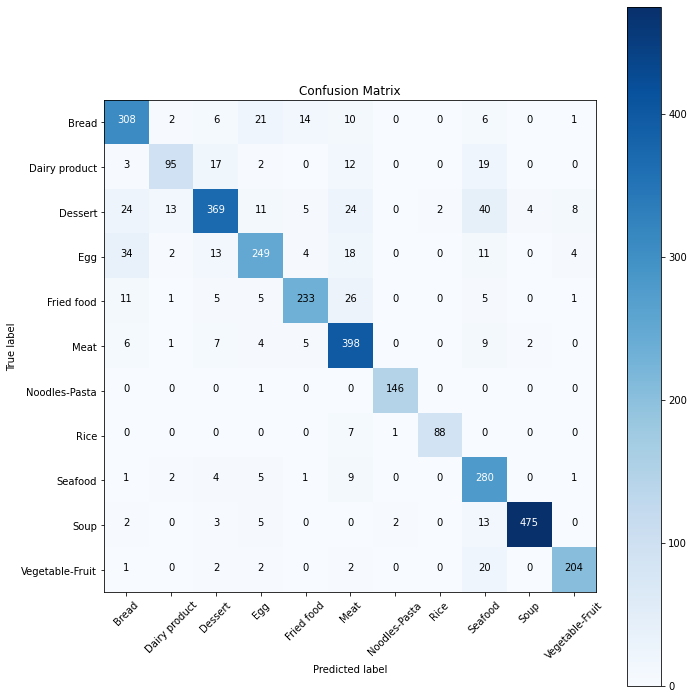

In [ ]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_generator)#, nb_test_samples // BATCH_SIZE, workers=1)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [ ]:
import seaborn as sns

date_results={
    "Val_loss":[val_loss[0],val_loss[1],val_loss[2]],
    "Val_accuracy":[val_accuracy[0],val_accuracy[1],val_accuracy[2]],
    "Test_loss":[test_loss[0],test_loss[1],test_loss[2]],
    "Test_accuracy":[test_accuracy[0],test_accuracy[1],test_accuracy[2]],
    "Model":['CNN1','CNN20','TL45']}

date_result=pd.DataFrame(date_results)
date_result2 = date_result.iloc[:3,:4]*100
date_result3 = pd.concat([date_result2,date_result['Model']],axis=1)
date_result3.head()

,Val_loss,Val_accuracy,Test_loss,Test_accuracy,Model
0,170.118177,40.615836,169.214594,43.949807,CNN1
1,145.268214,48.093840,140.467310,52.166116,CNN20
2,54.056603,83.299494,49.372438,85.001493,TL45


In [ ]:
date_result4 = date_result3.copy()
date_result4.index = date_result4['Model']
date_result4 = date_result4.drop(columns="Model")
date_result4.head()

,Val_loss,Val_accuracy,Test_loss,Test_accuracy
Model,,,,
CNN1,170.118177,40.615836,169.214594,43.949807
CNN20,145.268214,48.093840,140.467310,52.166116
TL45,54.056603,83.299494,49.372438,85.001493


<Axes: xlabel='Model'>

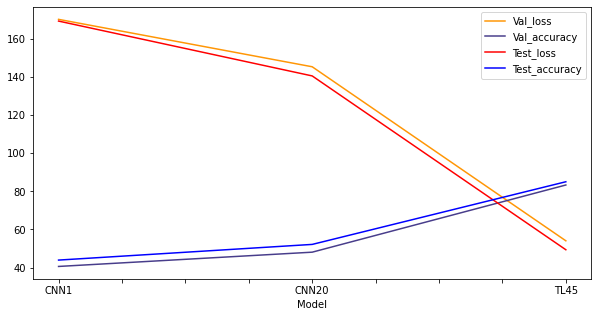

In [ ]:
date_result4.plot.line(figsize=(10,5),color=['#ff9605','#483D8B','#FF0000','#0000FF'])


In [ ]:
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

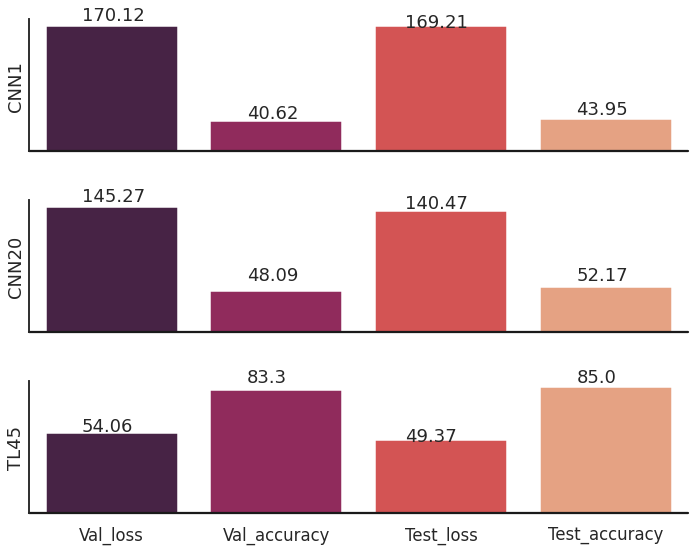

In [ ]:
# Set up the matplotlib figure

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
#

# Generate some sequential data
x = np.array(date_result3.columns[:4])
y1 = np.array(date_result3.iloc[0,:4].values)
y1 = [round(num,2) for num in y1]
#
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel(date_result3["Model"][0])
#ax1.text(x=x,y=y1,color='black', ha="center")
ax1.text(0.08, 1.10, y1[0], ha="left", va="top", transform=ax1.transAxes)
ax1.text(0.33, 0.36, y1[1], ha="left", va="top", transform=ax1.transAxes)
ax1.text(0.57, 1.05, y1[2], ha="left", va="top", transform=ax1.transAxes)
ax1.text(0.83, 0.39, y1[3], ha="left", va="top", transform=ax1.transAxes)
#
# Center the data to make it diverging
y2 = np.array(date_result3.iloc[1,:4].values)
y2 = [ round(num,2) for num in y2]
sns.barplot(x=x, y=y2, palette="rocket", ax=ax2)#vlag
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel(date_result3["Model"][1])
ax2.text(0.08, 1.10, y2[0], ha="left", va="top", transform=ax2.transAxes)
ax2.text(0.33, 0.5, y2[1], ha="left", va="top", transform=ax2.transAxes)
ax2.text(0.57, 1.05, y2[2], ha="left", va="top", transform=ax2.transAxes)
ax2.text(0.83, 0.5, y2[3], ha="left", va="top", transform=ax2.transAxes)
#
# Randomly reorder the data to make it qualitative
y3 = np.array(date_result3.iloc[2,:4].values)
y3 = [ round(num,2) for num in y3]
sns.barplot(x=x, y=y3, palette="rocket", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel(date_result3["Model"][2])
ax3.text(0.08, 0.73, y3[0], ha="left", va="top", transform=ax3.transAxes)
ax3.text(0.33, 1.1, y3[1], ha="left", va="top", transform=ax3.transAxes)
ax3.text(0.57, 0.65, y3[2], ha="left", va="top", transform=ax3.transAxes)
ax3.text(0.83, 1.1, y3[3], ha="left", va="top", transform=ax3.transAxes)

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
#plt.title("Peformance of CNN's and Transfer Learn",x=0.5,y=4)